

# Price Prediction Of Diamonds: Regression




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, RandomizedSearchCV
from scipy.stats import uniform


%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading our data:

In [4]:
diamond = pd.read_csv('diamonds.csv')

In [5]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamond.shape

(53940, 10)

In [7]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
s = (diamond.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization



In [10]:
diamond['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [11]:
diamond['price'].mean()

3932.799721913237

In [12]:
diamond['price'].median()

2401.0

In [13]:
diamond['price'].std()

3989.439738146379

<Axes: >

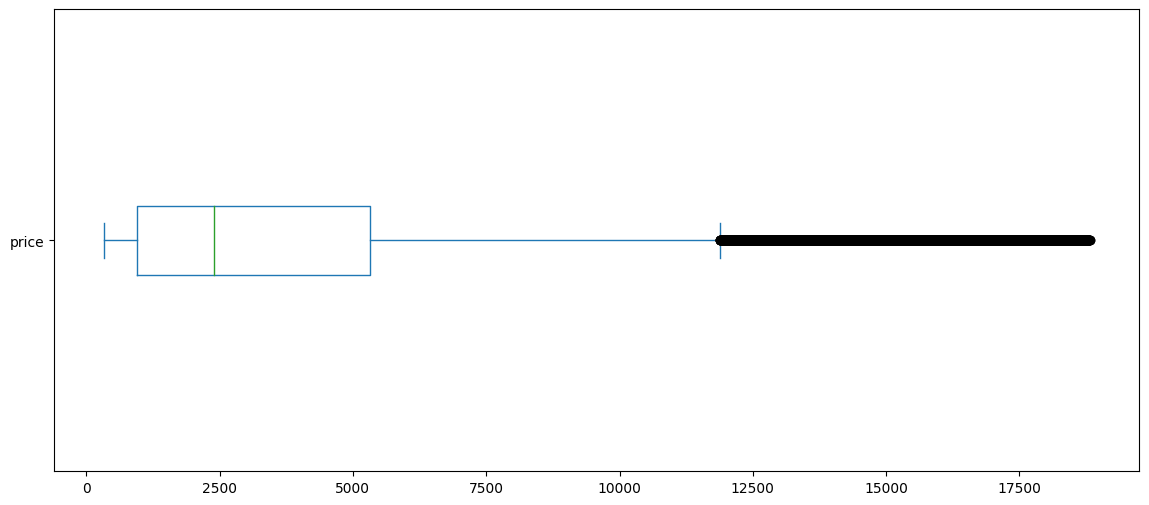

In [14]:
diamond['price'].plot(kind='box', vert=False, figsize=(14,6))

In [15]:
diamond = diamond[diamond['price'] <= 12500]

<Axes: >

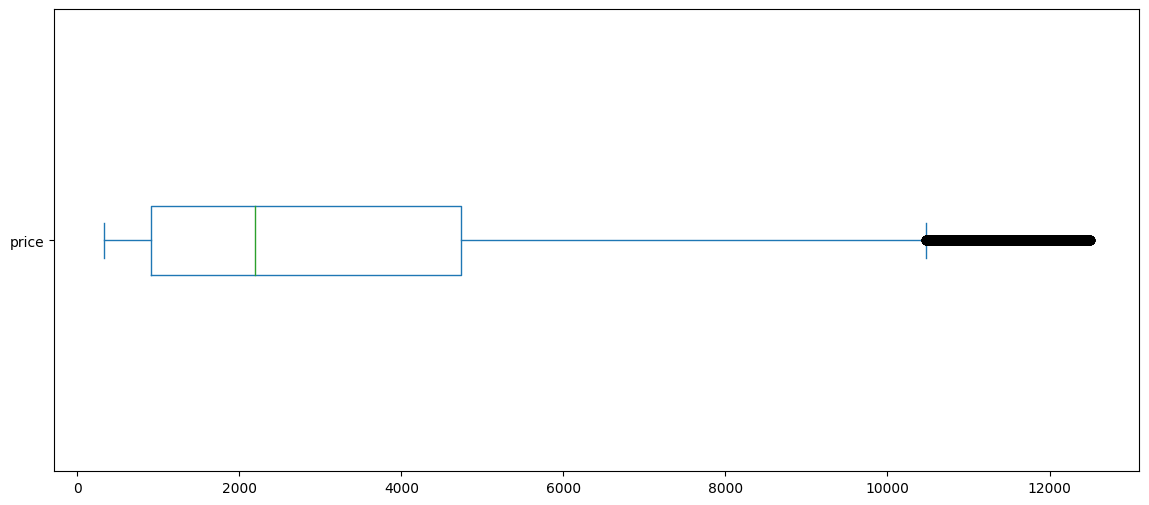

In [16]:
diamond['price'].plot(kind='box', vert=False, figsize=(14,6))

In [17]:
print(diamond['price'].mean())
print(diamond['price'].median())

3235.220595758077
2190.0


<Axes: ylabel='Density'>

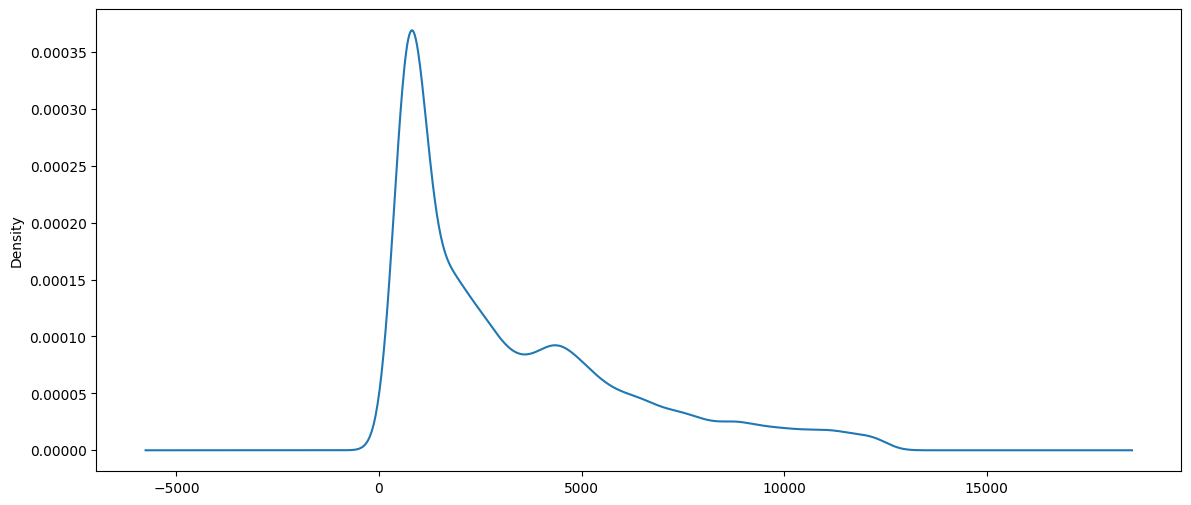

In [18]:
diamond['price'].plot(kind='density', figsize=(14,6)) # kde

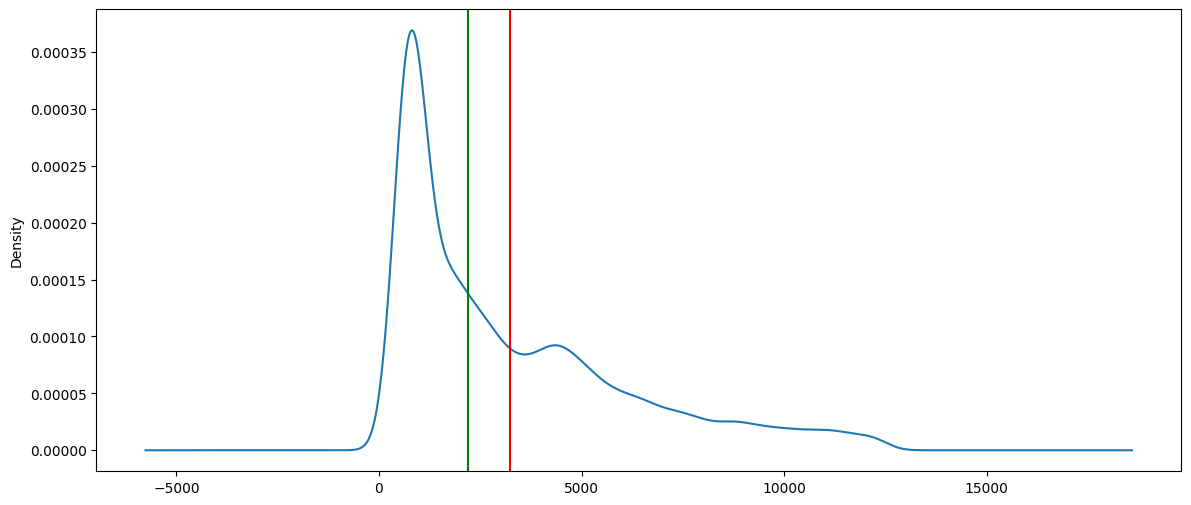

In [19]:
ax = diamond['price'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(diamond['price'].mean(), color='red')
ax.axvline(diamond['price'].median(), color='green')

Text(0.5, 0, 'dollars')

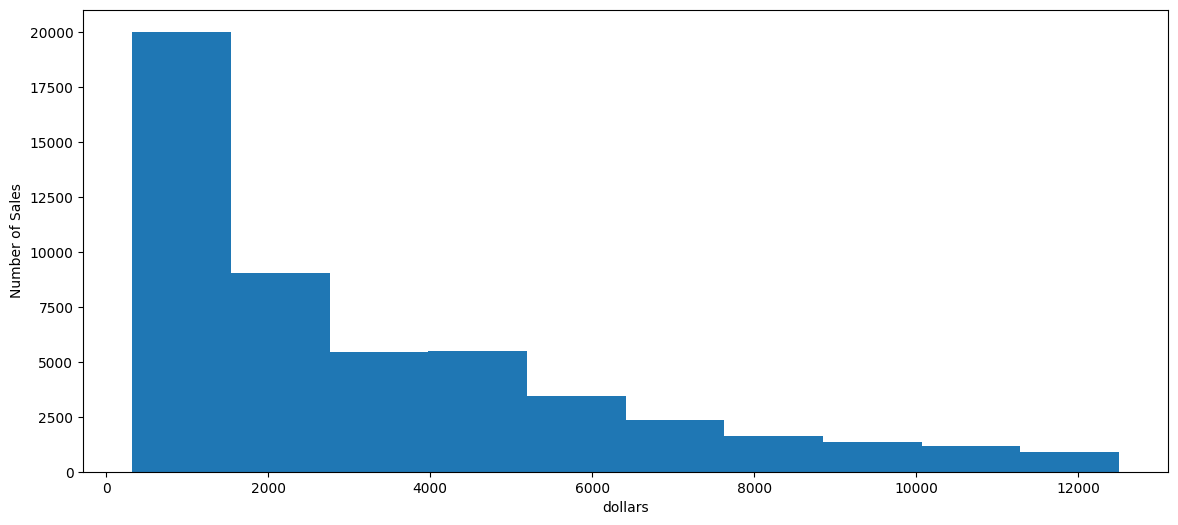

In [20]:
ax = diamond['price'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Cleaning


In [21]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
diamond['cut'].value_counts()

cut
Ideal        20550
Premium      12673
Very Good    11422
Good          4664
Fair          1517
Name: count, dtype: int64

<Axes: ylabel='count'>

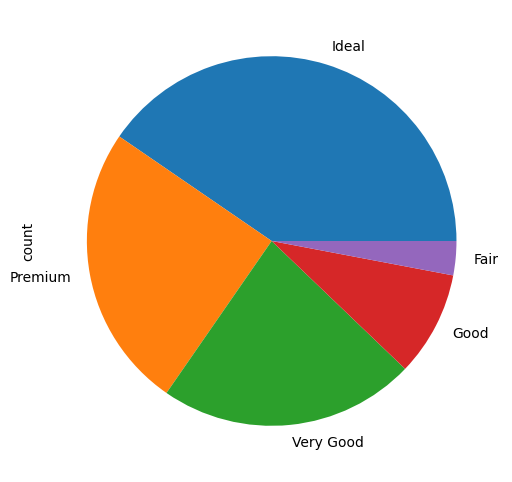

In [23]:
diamond['cut'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Diamonds')

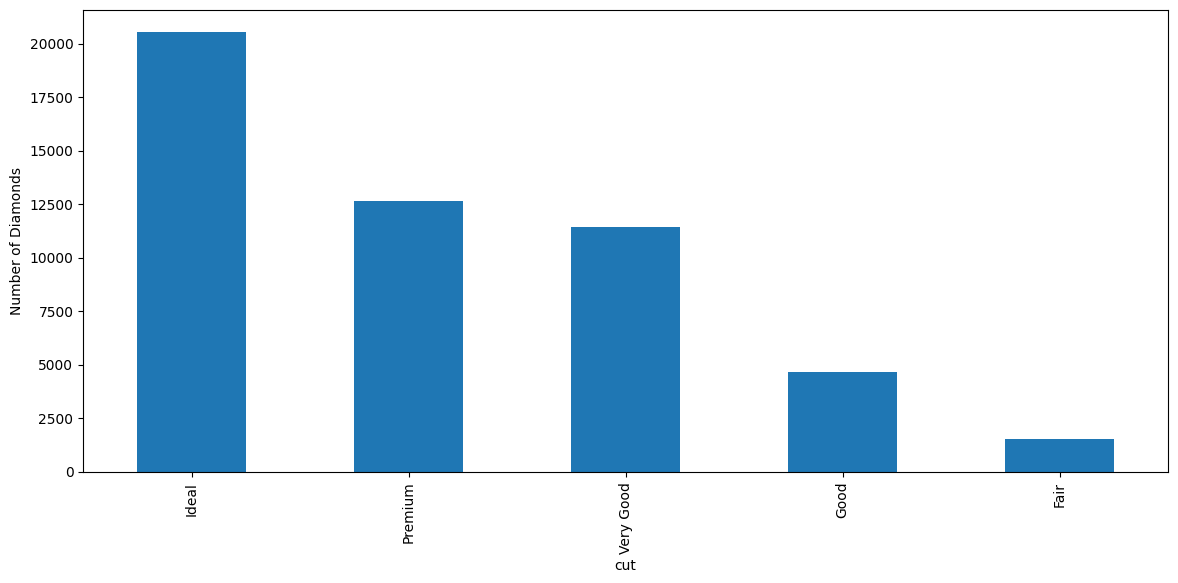

In [24]:
ax = diamond['cut'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Diamonds')

<Axes: xlabel='carat', ylabel='price'>

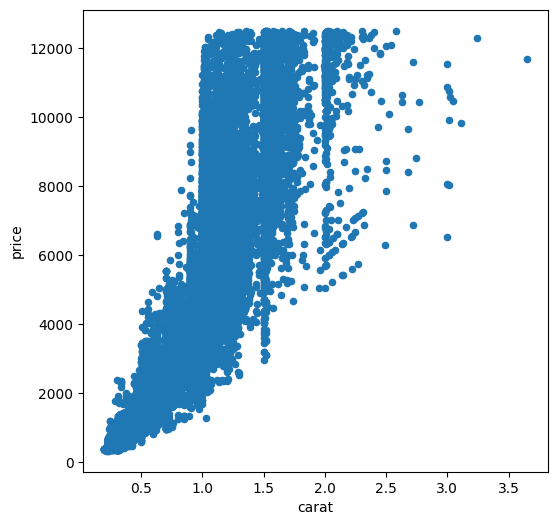

In [25]:
diamond.plot(kind='scatter', x='carat', y='price', figsize=(6,6))

In [26]:
diamond = diamond[diamond['carat'] < 3.0]

<Axes: xlabel='carat', ylabel='price'>

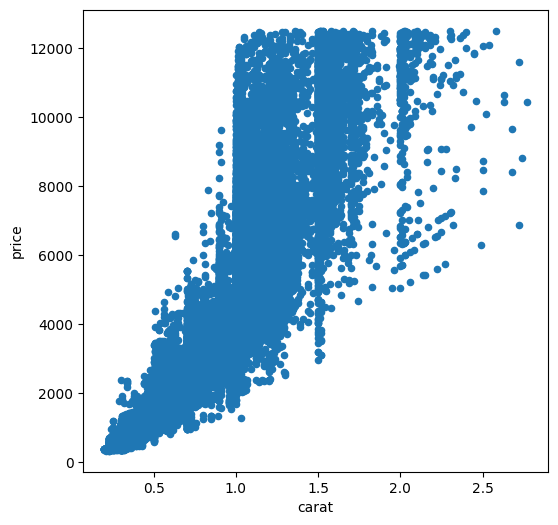

In [27]:
diamond.plot(kind='scatter', x='carat', y='price', figsize=(6,6))

Text(0, 0.5, 'Profit')

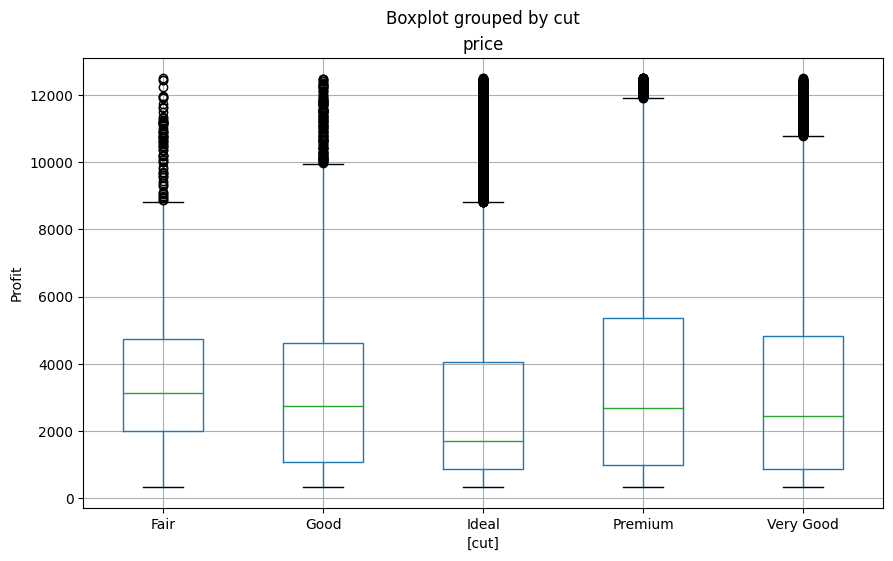

In [28]:
ax = diamond[['price', 'cut']].boxplot(by='cut', figsize=(10,6))
ax.set_ylabel('Profit')

carat       Axes(0.125,0.53;0.227941x0.35)
price    Axes(0.398529,0.53;0.227941x0.35)
dtype: object

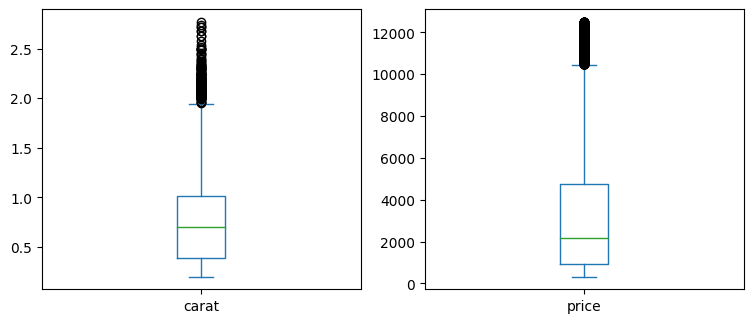

In [29]:
boxplot_cols = ['carat', 'price']

diamond[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

In [30]:
#Dropping the outliers. 
diamond = diamond[(diamond["depth"]<75)&(diamond["depth"]>45)]
diamond = diamond[(diamond["table"]<80)&(diamond["table"]>40)]
diamond = diamond[(diamond["x"]<30)]
diamond = diamond[(diamond["y"]<30)]
diamond = diamond[(diamond["z"]<30)&(diamond["z"]>2)]

#### Dropping dimentionless diamonds

In [31]:
diamond = diamond.drop(diamond[diamond["x"]==0].index)
diamond = diamond.drop(diamond[diamond["y"]==0].index)
diamond = diamond.drop(diamond[diamond["z"]==0].index)

# Data describe

In [32]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,50790.000000,50790.000000,50790.000000,50790.000000,50790.000000,50790.000000,50790.000000
mean,0.731010,61.754771,57.425105,3233.034121,5.599288,5.601826,3.458411
std,0.391463,1.415950,2.226269,2872.125449,1.005660,0.998050,0.622487
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.390000,61.100000,56.000000,914.000000,4.670000,4.690000,2.880000
50%,0.700000,61.800000,57.000000,2187.500000,5.610000,5.600000,3.450000
75%,1.010000,62.500000,59.000000,4733.000000,6.440000,6.440000,3.990000
max,2.770000,73.600000,79.000000,12500.000000,9.170000,9.130000,5.760000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Create the model

In [33]:
label_data = diamond.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [34]:
corrMatrix = label_data.corr()

In [35]:
print(corrMatrix)

            carat       cut     color   clarity     depth     table     price   
carat    1.000000  0.009266  0.270822 -0.233137  0.044465  0.184570  0.917988  \
cut      0.009266  1.000000 -0.001950  0.028547 -0.194562  0.151828  0.035122   
color    0.270822 -0.001950  1.000000 -0.021237  0.053178  0.019195  0.151898   
clarity -0.233137  0.028547 -0.021237  1.000000 -0.056505 -0.087726 -0.074951   
depth    0.044465 -0.194562  0.053178 -0.056505  1.000000 -0.298404  0.002288   
table    0.184570  0.151828  0.019195 -0.087726 -0.298404  1.000000  0.127988   
price    0.917988  0.035122  0.151898 -0.074951  0.002288  0.127988  1.000000   
x        0.982621  0.014233  0.247151 -0.239124 -0.016944  0.194823  0.896894   
y        0.981471  0.020566  0.247000 -0.236006 -0.020383  0.187998  0.898585   
z        0.982068 -0.008699  0.252478 -0.243535  0.115096  0.151066  0.892114   

                x         y         z  
carat    0.982621  0.981471  0.982068  
cut      0.014233  0.020566 

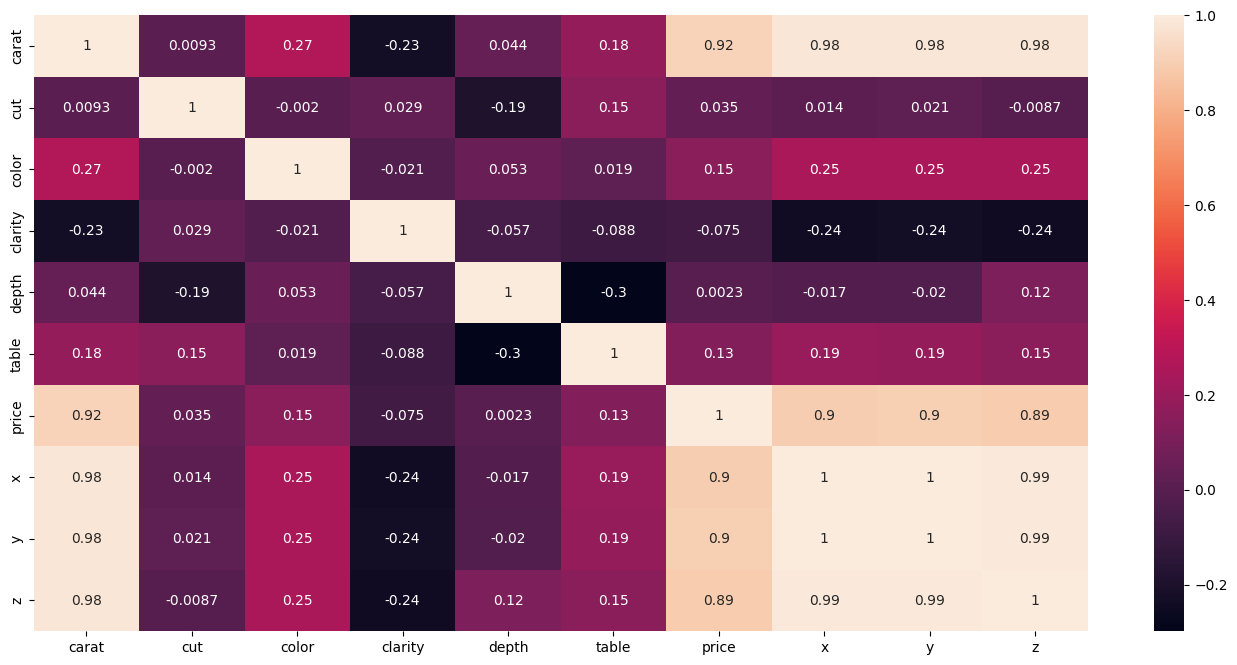

In [36]:
plt.figure(figsize = (17,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [37]:
# Assigning the featurs as X and target as y
featurs = label_data.drop(["price"],axis =1)
target = label_data["price"]

featurs_train, featurs_test, target_train, target_test = train_test_split(featurs, target, test_size=0.30, random_state=7)

In [38]:
featurs.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [39]:
target.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# RandomForest

In [40]:
classifier_RandomForest  = RandomForestRegressor()
classifier_RandomForest.fit(featurs_train, target_train)

y_pred_RandomForest = classifier_RandomForest.predict(featurs_test)

print('###### Random Forest ######')
print('Score : %.4f' % classifier_RandomForest.score(featurs_test, target_test))
print('')

mse = mean_squared_error(target_test, y_pred_RandomForest)
mae = mean_absolute_error(target_test, y_pred_RandomForest)
rmse = mean_squared_error(target_test, y_pred_RandomForest) ** 0.5
r2 = r2_score(target_test, y_pred_RandomForest)

print('MSE    : %.2f' % mse)
print('MAE    : %.2f' % mae)
print('RMSE   : %.2f' % rmse)
print('R2     : %.2f' % r2)

accuracies = cross_val_score(estimator=classifier_RandomForest, X=featurs_train, y=target_train, cv=10, verbose=1)
print('')
print('Cross-Validation Accuracies:')
print(accuracies)


###### Random Forest ######
Score : 0.9811

MSE    : 155179.42
MAE    : 213.80
RMSE   : 393.93
R2     : 0.98


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Cross-Validation Accuracies:
[0.98215989 0.98023613 0.98162381 0.98097013 0.98292617 0.98156759
 0.98055818 0.98267852 0.98286704 0.98087639]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.5min finished


In [41]:
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
params_dict = dict(max_features=max_features_range, n_estimators=n_estimators_range)

In [45]:
classifier_RandomForest = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
classifier_RandomForest.fit(featurs_train,target_train)
print('Score : %.4f' % classifier_RandomForest.score(featurs_test, target_test))
pred_RandomForest = classifier_RandomForest.predict(featurs_test)
r2_RandomForest = r2_score(target_test, pred_RandomForest)
print('R2     : %0.2f ' % r2_RandomForest)

KeyboardInterrupt: 

In [ ]:
# print the best parameters from GridSearchCV
print('GridSearchCV Best Params:', classifier_RandomForest.best_params_)

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (classifier_RandomForest.best_params_, classifier_RandomForest.best_score_))

The best parameters are {'max_features': 5, 'n_estimators': 170} with a score of 0.98


In [ ]:
grid_results_RandomForest = pd.concat([pd.DataFrame(classifier_RandomForest.cv_results_["params"]),pd.DataFrame(classifier_RandomForest.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results_RandomForest.head()

,max_features,n_estimators,Accuracy
0,1,10,0.957681
1,1,20,0.959642
2,1,30,0.961147
3,1,40,0.962125
4,1,50,0.963620


In [ ]:
grid_contour_RandomForest = grid_results_RandomForest.groupby(['max_features','n_estimators']).mean()
grid_contour_RandomForest

Accuracy
max_features n_estimators          
1            10            0.957681
             20            0.959642
             30            0.961147
             40            0.962125
             50            0.963620
...                             ...
5            160           0.981334
             170           0.981460
             180           0.981424
             190           0.981387
             200           0.981434

[100 rows x 1 columns]

In [ ]:
grid_reset_RandomForest = grid_contour_RandomForest.reset_index()
grid_reset_RandomForest.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot_RandomForest = grid_reset_RandomForest.pivot(index='max_features', columns='n_estimators', values='Accuracy')
grid_pivot_RandomForest

n_estimators,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
max_features,,,,,,,,,,,,,,,,,,,,
1,0.957681,0.959642,0.961147,0.962125,0.963620,0.963541,0.962255,0.962777,0.963272,0.963598,0.963103,0.963159,0.963414,0.963639,0.963779,0.963462,0.963387,0.963414,0.963519,0.963403
2,0.969043,0.971440,0.972248,0.972880,0.973784,0.973554,0.974032,0.973983,0.973713,0.974031,0.973995,0.974115,0.974146,0.974205,0.974297,0.974344,0.974164,0.974223,0.974277,0.974249
3,0.975334,0.977301,0.977807,0.978298,0.978370,0.978496,0.978721,0.978741,0.978661,0.978888,0.978790,0.978820,0.978871,0.978792,0.978906,0.978895,0.978810,0.979041,0.978931,0.979003
4,0.977711,0.979378,0.979728,0.980263,0.980404,0.980317,0.980343,0.980619,0.980579,0.980652,0.980577,0.980574,0.980764,0.980778,0.980790,0.980716,0.980712,0.980757,0.980799,0.980766
5,0.978948,0.980367,0.980638,0.980930,0.980938,0.981201,0.981118,0.981257,0.981245,0.981184,0.981356,0.981340,0.981398,0.981375,0.981342,0.981334,0.981460,0.981424,0.981387,0.981434


In [ ]:
x_RandomForest = grid_pivot_RandomForest.columns.get_level_values('n_estimators').values
y_RandomForest = grid_pivot_RandomForest.index.values
z_RandomForest = grid_pivot_RandomForest.values

In [ ]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z_RandomForest, x=x_RandomForest, y=y_RandomForest)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

### Best model accuracy 98.14%

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# LinearRegression

In [60]:
# create a linear regression object
model = LinearRegression()

# define the parameter distributions for RandomizedSearchCV
param_dist = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'n_jobs': [1, -1],
              'positive': [True, False],}

# perform randomized search with 10-fold cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=10, n_iter=10, random_state=0)
random_search.fit(featurs_train,target_train)

print('Score : %.4f' % random_search.score(featurs_test, target_test))
pred_random_search = random_search.predict(featurs_test)
r2_random_search = r2_score(target_test, pred_random_search)
print('R2     : %0.2f ' % r2_random_search)



# print the best parameters from GridSearchCV
print('RandomizedSearchCV Best Params:', random_search.best_params_)

Score Grid search: 0.8813
R2 Grid search     : 0.88 
Score : 0.8813
R2     : 0.88 
GridSearchCV Best Params: {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': False}
RandomizedSearchCV Best Params: {'positive': False, 'n_jobs': 1, 'fit_intercept': False, 'copy_X': False}


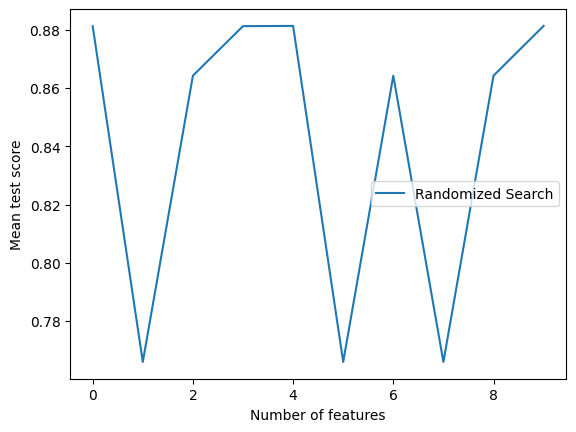

In [57]:
# plot the results of the randomized search
plt.plot(random_search.cv_results_['mean_test_score'], label='Randomized Search')
plt.xlabel('Number of features')
plt.ylabel('Mean test score')
plt.legend()

# show the plots
plt.show()

### Best model accuracy 88.13%